<a href="https://colab.research.google.com/github/clairemasse/Coursera_capstone/blob/master/Comparing_Neighborhoods_in_London_%26_Brooklyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Coursera Capstone Final Project:#


### Introduction & Business Problem ###

For my project I will be comparing neighborhoods in two major cities. I lived in New York City for 3 years, the last of which I lived in Bedford-Stuyvesant, Brooklyn. I am hoping to move to London in the next few months, and will need to think about which neighborhood I should live in. So for this project, I decided to compare neighborhoods in both cities to see which neighborhood in London is the most similar to the one I lived in in Brooklyn.

Hopefully, by the end of my analysis, I will be able to narrow it down to a few neighborhoods in London which will make my apartment search easier if I move to London. 

### Data ###

I will be using geographical data available online for the neighborhoods in both cities and then use the geopy package to get latitude and longitude coordinates. 
I will use the Foursquare API in order to examine and compare the venues (restaurants, bars, gyms, stores...) in both cities. I will use k-means clustering to cluster the neighborhoods based on their similarities - I am hoping that by the end of my analysis I'll be able to narrow it down to a few neighborhoods in London within the same cluster as the one I lived in in Brooklyn. 

In [1]:
#Import all necessary libraries

import pandas as pd
import numpy as np
from IPython.display import display
import requests
import json
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
from IPython.display import Image
from IPython.core.display import HTML
# transforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed!')

/bin/bash: conda: command not found
Folium installed!


In [2]:
# Importing Brooklyn neighborhood data
bk = pd.read_csv('https://raw.githubusercontent.com/clairemasse/Coursera_capstone/master/Brooklyn%20Neighborhoods%20-%20Sheet1.csv')

In [3]:
bk

,Neighborhood
0,"Crown Heights, Brooklyn"
1,"Ditmas Park, Brooklyn"
2,"East Flatbush, Brooklyn"
3,"Prospect Park South, Brooklyn"
4,"Windsor Terrace, Brooklyn"
5,"Kensington, Brooklyn"
6,"Brownsville, Brooklyn"
7,"Canarsie, Brooklyn"
8,"Cypress Hills, Brooklyn"
9,"New Lots, Brooklyn"


In [4]:
# Define lat/lon functions to add columns to dataframe

geolocator = Nominatim(user_agent="foursquare_agent")

def latitude(address):
  location = geolocator.geocode(address)
  lat = location.latitude
  return lat

def longitude(address):
  location = geolocator.geocode(address)
  lon = location.longitude
  return lon




In [5]:
bk['latitude'] = bk['Neighborhood'].apply(lambda x: latitude(x))
bk['longitude'] = bk['Neighborhood'].apply(lambda x: longitude(x))

In [6]:
bk

,Neighborhood,latitude,longitude
0,"Crown Heights, Brooklyn",40.667471,-73.943566
1,"Ditmas Park, Brooklyn",40.637531,-73.963449
2,"East Flatbush, Brooklyn",40.653715,-73.930415
3,"Prospect Park South, Brooklyn",40.661774,-73.971089
4,"Windsor Terrace, Brooklyn",40.655785,-73.976544
5,"Kensington, Brooklyn",40.646215,-73.970694
6,"Brownsville, Brooklyn",40.667236,-73.906798
7,"Canarsie, Brooklyn",40.643715,-73.900692
8,"Cypress Hills, Brooklyn",40.689909,-73.872660
9,"New Lots, Brooklyn",40.665143,-73.885891


In [7]:
ldn = pd.read_csv('https://raw.githubusercontent.com/clairemasse/Coursera_capstone/master/london_postcodes%20-%20London_postcodes%20-%20Sheet2%20(1)%20(1).csv')

In [8]:
ldn.head(5)

,Neighborhood,Post Code
0,"Whitechapel, Stepney, Mile End",E1
1,Wapping,E1W
2,"Bethnal Green, Shoreditch",E2
3,Clapton,E5
4,"Hackney, Dalston",E8


In [9]:
ldn['location'] = ldn['Neighborhood'].apply(lambda x: geolocator.geocode(x))
ldn.dropna(inplace=True)

In [10]:
ldn.reset_index(inplace=True)
ldn = ldn[ldn.Neighborhood!='Balham']
ldn

,index,Neighborhood,Post Code,location
0,0,"Whitechapel, Stepney, Mile End",E1,"(Mile End Road, Globe Town, Stepney, London Bo..."
1,1,Wapping,E1W,"(Wapping, London, Greater London, England, E1W..."
2,2,"Bethnal Green, Shoreditch",E2,"(Mulberry Academy Shoreditch, Gosset Street, S..."
3,3,Clapton,E5,"(Clapton, London Borough of Hackney, London, G..."
4,4,"Hackney, Dalston",E8,"(Dalston, London Borough of Hackney, London, G..."
5,5,"Hackney, Homerton",E9,"(Homerton, Sedgwick Street, Victoria Park Vill..."
6,8,"Bloomsbury, Grays Inn",WC1,"(Bloomsbury Square, St Giles, Holborn, London ..."
7,9,"Covent Garden, Holborn, Strand",WC2,"(Strand, St Clement Danes, Covent Garden, City..."
8,10,"Clerkenwell, Finsbury, Barbican",EC1,"(Barbican, Charterhouse Square, Smithfield, Ci..."
9,12,"Monument, Tower Hill, Aldgate",EC3,"(Tower Bridge, Wapping, London Borough of Towe..."


In [11]:
ldn.drop(['index', 'location'],axis=1,inplace=True)

In [12]:
ldn['latitude'] = ldn['Neighborhood'].apply(lambda x:latitude(x))
ldn['longitude'] = ldn['Neighborhood'].apply(lambda x: longitude(x))

In [13]:
ldn

,Neighborhood,Post Code,latitude,longitude
0,"Whitechapel, Stepney, Mile End",E1,51.520435,-0.053122
1,Wapping,E1W,51.505436,-0.058729
2,"Bethnal Green, Shoreditch",E2,51.527087,-0.070016
3,Clapton,E5,51.558602,-0.055878
4,"Hackney, Dalston",E8,51.546117,-0.075679
5,"Hackney, Homerton",E9,51.547079,-0.043121
6,"Bloomsbury, Grays Inn",WC1,51.518768,-0.122730
7,"Covent Garden, Holborn, Strand",WC2,51.512862,-0.114074
8,"Clerkenwell, Finsbury, Barbican",EC1,51.520150,-0.098683
9,"Monument, Tower Hill, Aldgate",EC3,51.505499,-0.075358


In [14]:
neighborhoods = ldn.append(bk)

In [15]:
neighborhoods.reset_index(inplace=True)


In [16]:
neighborhoods.drop(columns = {'index', 'Post Code'}, axis=1, inplace= True)

In [17]:
neighborhoods

,Neighborhood,latitude,longitude
0,"Whitechapel, Stepney, Mile End",51.520435,-0.053122
1,Wapping,51.505436,-0.058729
2,"Bethnal Green, Shoreditch",51.527087,-0.070016
3,Clapton,51.558602,-0.055878
4,"Hackney, Dalston",51.546117,-0.075679
...,...,...,...
91,"Bay Ridge, Brooklyn",40.633993,-74.014584
92,"Bensonhurst, Brooklyn",40.604977,-73.993406
93,"Borough Park, Brooklyn",40.633993,-73.996806
94,"Dyker Heights, Brooklyn",40.620472,-74.011667


In [18]:
# create map of Brooklyn using latitude and longitude values
bk_lat = 40.650002
bk_lon = -73.949997
map_bk = folium.Map(location=[bk_lat, bk_lon], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(neighborhoods['latitude'], neighborhoods['longitude'], neighborhoods['Neighborhood']):
    label = neighborhood
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bk)  
    
map_bk

In [19]:
# create map of London using latitude and longitude values
ldn_lat = 51.509865
ldn_lon = -0.118092
map_ldn = folium.Map(location=[ldn_lat, ldn_lon], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(neighborhoods['latitude'], neighborhoods['longitude'], neighborhoods['Neighborhood']):
    label = neighborhood
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ldn)  
    
map_ldn

In [20]:
# Now that we have all the neighborhoods in both cities marked and identified, it's time cluster them using Foursquare API location data

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [21]:
# Foursquare API credentials

CLIENT_ID = 'GLELENDKNLLSRPHH3U1MA2UMELUP5XGF2BLSAPNBONU1JNUN' 
CLIENT_SECRET = 'ROLVMW2QZPVRT1MVMSLT14MFTHB3AURMI23D5LODTESFT0FY' 
VERSION = '20180605' 



In [22]:
LIMIT = 50
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
bkldn_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['latitude'],
                                   longitudes=neighborhoods['longitude']
                                  )

Whitechapel, Stepney, Mile End
Wapping
Bethnal Green, Shoreditch
Clapton
Hackney, Dalston
Hackney, Homerton
Bloomsbury, Grays Inn
Covent Garden, Holborn, Strand
Clerkenwell, Finsbury, Barbican
Monument, Tower Hill, Aldgate
Islington, Barnsbury, Canonbury
Finsbury Park, Manor House
Highbury
Highgate
Holloway
Hornsey, Crouch End
Seven Sisters
Stoke Newington, Stamford Hill
Archway, Tufnell Park
Regents Park, Camden Town
Hampstead, Swiss Cottage
Kentish Town
St Johns Wood
Willesden, Harlesden, Kensal Green
Brockley, Crofton Park, Honor Oak Park
Camberwell
Lambeth
Lee, Grove Park
New Cross, New Cross Gate
Peckham, Nunhead
Walworth, Elephant & Castle
East Dulwich
Forest Hill
Herne Hill
Westminster, Belgravia, Pimlico
Chelsea, Brompton
Clapham
Earls Court
Fulham, Parsons Green
South Kensington
Stockwell, Brixton
Battersea, Clapham Junction
Mayfair, Marylebone, Soho
Bayswater, Paddington
Hammersmith
Kensington
Maida Vale, Warwick Avenue
Ladbroke Grove, North Kensington
Notting Hill, Holland P

In [25]:
print('The dataframe returns', bkldn_venues.shape[0], 'venues.')
bkldn_venues.head()

The dataframe returns 3340 venues.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Whitechapel, Stepney, Mile End",51.520435,-0.053122,Rinkoff's Bakery,51.519964,-0.053238,Bakery
1,"Whitechapel, Stepney, Mile End",51.520435,-0.053122,Genesis Cinema,51.521036,-0.051073,Movie Theater
2,"Whitechapel, Stepney, Mile End",51.520435,-0.053122,One Mile End,51.520151,-0.056136,Brewery
3,"Whitechapel, Stepney, Mile End",51.520435,-0.053122,Mouse Tail Coffee Stories,51.519471,-0.058573,Coffee Shop
4,"Whitechapel, Stepney, Mile End",51.520435,-0.053122,Basicsalon,51.520669,-0.056093,Cosmetics Shop


In [26]:
# Number of venues per neighborhood
test = bkldn_venues.groupby('Neighborhood')['Venue'].count()
test.sort_values(inplace=True)
test.head(10)

#display(bkldn_venues.groupby('Neighborhood')['Venue'].count().head(10))


Neighborhood
Marine Park, Brooklyn         1
Mill Basin, Brooklyn          2
Lee, Grove Park               2
Barren Island, Brooklyn       3
New Cross, New Cross Gate     4
Plumb Beach, Brooklyn         6
East New York, Brooklyn       9
Midwood, Brooklyn             9
Cypress Hills, Brooklyn      10
Bushwick, Brooklyn           10
Name: Venue, dtype: int64

In [27]:
print('There are {} unique categories.'.format(len(bkldn_venues['Venue Category'].unique())))

There are 319 unique categories.


We will use one-hot encoding to analyze all the different neighborhoods

In [28]:
# one hot encoding
bkldn_onehot = pd.get_dummies(bkldn_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bkldn_onehot['Neighborhood'] = bkldn_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bkldn_onehot.columns[-1]] + list(bkldn_onehot.columns[:-1])
bkldn_onehot = bkldn_onehot[fixed_columns]

bkldn_onehot.head()

,Zoo Exhibit,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Austrian Restaurant,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,...,Steakhouse,Street Art,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Udon Restaurant,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfall,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
#Let's group by neighborhood and take the mean of the frequency of occurence of each category

bkldn_grouped = bkldn_onehot.groupby('Neighborhood').mean().reset_index()
display(bkldn_grouped.head())


,Neighborhood,Zoo Exhibit,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Austrian Restaurant,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,...,Steakhouse,Street Art,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Udon Restaurant,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfall,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio
0,"Archway, Tufnell Park",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.020000,0.0,0.040000,0.0,0.0,0.0,0.0,0.0,0.020000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.0,0.0,0.020000,0.000000,0.0,0.0,0.0,0.02,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1,"Barren Island, Brooklyn",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,"Battersea, Clapham Junction",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.052632,0.0,0.078947,0.0,0.0,0.0,0.0,0.0,0.026316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026316,0.0,...,0.0,0.0,0.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.026316,0.026316,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.026316
3,"Bay Ridge, Brooklyn",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.038462,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.038462,0.038462,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.038462,0.000000,0.0,0.0,0.0,0.00,0.038462,0.0,0.0,0.0,0.0,0.0,0.000000
4,"Bayswater, Paddington",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.02,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [30]:
#Top 5 venues in each neighborhood

num_top_venues = 5

for hood in bkldn_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bkldn_grouped[bkldn_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Archway, Tufnell Park----
                venue  freq
0  Italian Restaurant  0.10
1                 Pub  0.10
2                Café  0.06
3         Music Venue  0.06
4         Coffee Shop  0.06


----Barren Island, Brooklyn----
                venue  freq
0       National Park  0.33
1            Pharmacy  0.33
2  Athletics & Sports  0.33
3         Zoo Exhibit  0.00
4     Organic Grocery  0.00


----Battersea, Clapham Junction----
           venue  freq
0  Grocery Store  0.08
1            Bar  0.08
2       Pharmacy  0.08
3            Pub  0.08
4    Supermarket  0.05


----Bay Ridge, Brooklyn----
                   venue  freq
0     Chinese Restaurant  0.19
1           Dessert Shop  0.08
2     Seafood Restaurant  0.08
3  Vietnamese Restaurant  0.04
4        Bubble Tea Shop  0.04


----Bayswater, Paddington----
         venue  freq
0        Hotel  0.20
1          Pub  0.14
2         Café  0.10
3       Garden  0.08
4  Coffee Shop  0.06


----Bedford-Stuyvesant, Brooklyn----
           

In [31]:
### Put above into a pandas dataframe

# Function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]


# create dataframe and display top 10 venues for each neighborhood

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bkldn_grouped['Neighborhood']

for ind in np.arange(bkldn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bkldn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Archway, Tufnell Park",Pub,Italian Restaurant,Music Venue,Café,Coffee Shop,Pizza Place,Ethiopian Restaurant,Thai Restaurant,Park,Gym / Fitness Center
1,"Barren Island, Brooklyn",Athletics & Sports,National Park,Pharmacy,Yoga Studio,Farmers Market,Ethiopian Restaurant,Event Space,Exhibit,Factory,Falafel Restaurant
2,"Battersea, Clapham Junction",Pub,Grocery Store,Pharmacy,Bar,Supermarket,Coffee Shop,Bakery,Sandwich Place,Juice Bar,Bus Stop
3,"Bay Ridge, Brooklyn",Chinese Restaurant,Seafood Restaurant,Dessert Shop,Rental Car Location,Fried Chicken Joint,Noodle House,Malay Restaurant,Tea Room,Tennis Court,Bar
4,"Bayswater, Paddington",Hotel,Pub,Café,Garden,Coffee Shop,Indian Restaurant,Outdoor Sculpture,Greek Restaurant,Restaurant,Italian Restaurant


CLUSTER USING K-MEANS


In [32]:
bkldn_vals = bkldn_grouped.drop('Neighborhood', axis=1)

sum_of_squared_distances = []
K = range(1,15)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(bkldn_vals)
  sum_of_squared_distances.append(km.inertia_)

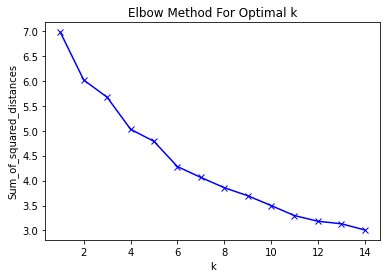

In [33]:
import matplotlib.pyplot as plt

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [34]:
# set number of clusters
kclusters = 8

bkldn_grouped_clustering = bkldn_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bkldn_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 1, 2, 1, 2, 7, 2, 1, 2], dtype=int32)

In [35]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bkldn_merged = neighborhoods

# merge bkldn data with original data to add latitude/longitude for each neighborhood
bkldn_merged = bkldn_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
bkldn_merged.head() 

,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Whitechapel, Stepney, Mile End",51.520435,-0.053122,1.0,Pub,Brewery,Supermarket,Sandwich Place,Chinese Restaurant,Asian Restaurant,Burger Joint,Fast Food Restaurant,Fried Chicken Joint,Market
1,Wapping,51.505436,-0.058729,1.0,Coffee Shop,Pub,Park,Italian Restaurant,Event Space,Gym / Fitness Center,River,Arts & Entertainment,Canal,Bar
2,"Bethnal Green, Shoreditch",51.527087,-0.070016,1.0,Coffee Shop,Pub,Café,Wine Bar,Furniture / Home Store,Tapas Restaurant,Italian Restaurant,Yoga Studio,Beer Bar,Bagel Shop
3,Clapton,51.558602,-0.055878,1.0,Grocery Store,Pub,Dumpling Restaurant,Café,Park,Garden,Sake Bar,Turkish Restaurant,Gym / Fitness Center,Cocktail Bar
4,"Hackney, Dalston",51.546117,-0.075679,1.0,Coffee Shop,Pub,Restaurant,Cocktail Bar,Café,Jazz Club,Pizza Place,Grocery Store,Burger Joint,Hotel


In [36]:
col = np.array(bkldn_merged['Cluster Labels'], np.int16)
bkldn_merged['Cluster Labels'] = col

In [37]:
bkldn_merged.head()

,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Whitechapel, Stepney, Mile End",51.520435,-0.053122,1,Pub,Brewery,Supermarket,Sandwich Place,Chinese Restaurant,Asian Restaurant,Burger Joint,Fast Food Restaurant,Fried Chicken Joint,Market
1,Wapping,51.505436,-0.058729,1,Coffee Shop,Pub,Park,Italian Restaurant,Event Space,Gym / Fitness Center,River,Arts & Entertainment,Canal,Bar
2,"Bethnal Green, Shoreditch",51.527087,-0.070016,1,Coffee Shop,Pub,Café,Wine Bar,Furniture / Home Store,Tapas Restaurant,Italian Restaurant,Yoga Studio,Beer Bar,Bagel Shop
3,Clapton,51.558602,-0.055878,1,Grocery Store,Pub,Dumpling Restaurant,Café,Park,Garden,Sake Bar,Turkish Restaurant,Gym / Fitness Center,Cocktail Bar
4,"Hackney, Dalston",51.546117,-0.075679,1,Coffee Shop,Pub,Restaurant,Cocktail Bar,Café,Jazz Club,Pizza Place,Grocery Store,Burger Joint,Hotel


In [38]:
bkldn_merged['Cluster Labels'].value_counts()

2    40
1    35
7    15
0     2
6     1
5     1
4     1
3     1
Name: Cluster Labels, dtype: int64

In [39]:
map_clusters = folium.Map(location=[bk_lat, bk_lon], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.gist_ncar(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bkldn_merged['latitude'], bkldn_merged['longitude'], bkldn_merged['Neighborhood'], bkldn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [43]:
map_clusters2 = folium.Map(location=[ldn_lat, ldn_lon], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.gist_ncar(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bkldn_merged['latitude'], bkldn_merged['longitude'], bkldn_merged['Neighborhood'], bkldn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)
       
map_clusters2

In [44]:
ldn2 = bkldn_merged

In [45]:
ldn2

,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Whitechapel, Stepney, Mile End",51.520435,-0.053122,1,Pub,Brewery,Supermarket,Sandwich Place,Chinese Restaurant,Asian Restaurant,Burger Joint,Fast Food Restaurant,Fried Chicken Joint,Market
1,Wapping,51.505436,-0.058729,1,Coffee Shop,Pub,Park,Italian Restaurant,Event Space,Gym / Fitness Center,River,Arts & Entertainment,Canal,Bar
2,"Bethnal Green, Shoreditch",51.527087,-0.070016,1,Coffee Shop,Pub,Café,Wine Bar,Furniture / Home Store,Tapas Restaurant,Italian Restaurant,Yoga Studio,Beer Bar,Bagel Shop
3,Clapton,51.558602,-0.055878,1,Grocery Store,Pub,Dumpling Restaurant,Café,Park,Garden,Sake Bar,Turkish Restaurant,Gym / Fitness Center,Cocktail Bar
4,"Hackney, Dalston",51.546117,-0.075679,1,Coffee Shop,Pub,Restaurant,Cocktail Bar,Café,Jazz Club,Pizza Place,Grocery Store,Burger Joint,Hotel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"Bay Ridge, Brooklyn",40.633993,-74.014584,2,Chinese Restaurant,Seafood Restaurant,Dessert Shop,Rental Car Location,Fried Chicken Joint,Noodle House,Malay Restaurant,Tea Room,Tennis Court,Bar
92,"Bensonhurst, Brooklyn",40.604977,-73.993406,7,Chinese Restaurant,Bank,Bakery,Pizza Place,Japanese Restaurant,Cantonese Restaurant,Mobile Phone Shop,Kids Store,Gourmet Shop,Coffee Shop
93,"Borough Park, Brooklyn",40.633993,-73.996806,7,Restaurant,Pizza Place,Pharmacy,Fast Food Restaurant,Bank,Sandwich Place,Grocery Store,Bistro,Coffee Shop,Café
94,"Dyker Heights, Brooklyn",40.620472,-74.011667,7,Bakery,Chinese Restaurant,Italian Restaurant,Bank,Deli / Bodega,Food & Drink Shop,Hardware Store,Sushi Restaurant,Bagel Shop,Clothing Store


In [46]:
ldn2['Cluster Labels'].value_counts()

2    40
1    35
7    15
0     2
6     1
5     1
4     1
3     1
Name: Cluster Labels, dtype: int64

In [47]:
ldn2=ldn2[ldn2['Cluster Labels']==2]

In [50]:
ldn2 = ldn2[~ldn2.Neighborhood.str.contains("Brooklyn")]

In [52]:
ldn2.reset_index(inplace=True)
ldn2.drop('index', inplace=True)

In [56]:
ldn2

,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bloomsbury, Grays Inn",51.518768,-0.122730,2,Hotel,Exhibit,Café,Cocktail Bar,History Museum,Coffee Shop,Plaza,Bookstore,English Restaurant,Burger Joint
1,"Clerkenwell, Finsbury, Barbican",51.520150,-0.098683,2,Coffee Shop,Café,Hotel,Plaza,Cocktail Bar,Beer Bar,Art Gallery,Indie Movie Theater,Wine Bar,French Restaurant
2,"Monument, Tower Hill, Aldgate",51.505499,-0.075358,2,Coffee Shop,History Museum,Hotel,Italian Restaurant,Scenic Lookout,English Restaurant,Pub,Steakhouse,Castle,Museum
3,Lambeth,51.501301,-0.117287,2,Hotel,Coffee Shop,Sandwich Place,Bar,Korean Restaurant,Event Space,Beer Bar,Movie Theater,Café,Scenic Lookout
4,"Westminster, Belgravia, Pimlico",51.490578,-0.152887,2,Italian Restaurant,Bakery,Clothing Store,Gastropub,Garden,Plaza,Mediterranean Restaurant,Restaurant,Boutique,French Restaurant
5,"Chelsea, Brompton",51.491822,-0.178326,2,Hotel,Italian Restaurant,Ice Cream Shop,Burger Joint,Sandwich Place,Bakery,Dessert Shop,Social Club,Seafood Restaurant,Residential Building (Apartment / Condo)
6,Clapham,51.462292,-0.138856,2,Burger Joint,Café,Bar,Restaurant,Pharmacy,Pizza Place,Gastropub,Pub,Indian Restaurant,Tapas Restaurant
7,South Kensington,51.494049,-0.173044,2,Café,Ice Cream Shop,Exhibit,Hotel,Science Museum,Bakery,Sandwich Place,Burger Joint,Gift Shop,Dessert Shop
8,"Stockwell, Brixton",51.462874,-0.113332,2,Pizza Place,Market,Indian Restaurant,Beer Bar,Brewery,Coffee Shop,Cocktail Bar,Caribbean Restaurant,Yoga Studio,Mexican Restaurant
9,"Mayfair, Marylebone, Soho",51.515938,-0.152046,2,Hotel,Juice Bar,Dessert Shop,Burger Joint,French Restaurant,Clothing Store,English Restaurant,Coffee Shop,Nail Salon,Sri Lankan Restaurant
